https://github.com/mctosima/pengantarDLpytorch/blob/main/IPYNB%20Code/15_CNNCIFAR.ipynb

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

Konfigurasi Device dan Hyperparameter
- Apabila GPU tersedia, gunakan GPU
- Jika GPU tidak tersedia, gunakan CPU
- Jumlah epoch, batch, dan learning rate di definisikan pada bagian ini

In [85]:
device          = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs      = 20
batch_size      = 4
learning_rate   = 0.001

### Konfigurasi Transform

- Pada percobaan ini, dataset CIFAR merupakan PILImage dengan rentang nilai pixel 0-1.
- Transformasi dilakukan untuk tipe data menjadi tensor
- Normalisasi dilakukan untuk mengubah nilai pixel menjadi 0-1

In [86]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

### Mengimpor Dataset

- Dataset tersedia melalui fungsi torchvision.datasets.CIFAR10 dengan beberapa penjelasan argumen sebagai berikut
    - root: direktori dataset
    - train: boolean, jika True, maka dataset akan dijadikan training set
    - transform: transformasi yang dilakukan pada dataset
    - download: boolean, jika True, maka dataset akan diunduh dari internet
- Dataset CIFAR10 ini merupakan dataset yang berisi 10 kategori dengan data training dan testing
- trainloader digunakan untuk memuat data training pada variabel trainset
- testloader digunakan untuk memuat data testing pada variabel testset
- argumen batch_size digunakan untuk mengatur jumlah data yang dibaca per batch
- argumen shuffle digunakan untuk mengatur apakah data akan diacak atau tidak
- argumen num_workers digunakan untuk mengatur jumlah thread yang digunakan untuk membaca data
    - Perlu diperhatikan bahwa jupyter notebook tidak mendukung multi-threading, jadi jika menggunakan multi-threading, maka harus menggunakan torch.multiprocessing.Pool

In [87]:
trainset = torchvision.datasets.CIFAR10(root="./35_data", train=True, download=True, transform=transform)

Files already downloaded and verified


In [88]:
testset = torchvision.datasets.CIFAR10(root="./35_data", train=False, download=True, transform=transform)

Files already downloaded and verified


In [89]:
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [90]:
# testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=0)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False)

Menginisiasi Kelas

In [91]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [92]:
test_images, test_labels = next(iter(trainloader))

# Desain Model

In [93]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

# Mendefinisikan fungsi loss dan optimizer

In [94]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Ilustrasi proses convolution layer

*Proses ini tidak dibutuhkan untuk melakukan training. Hanya gambaran bagi anda untuk mengetahui proses convolution layer*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


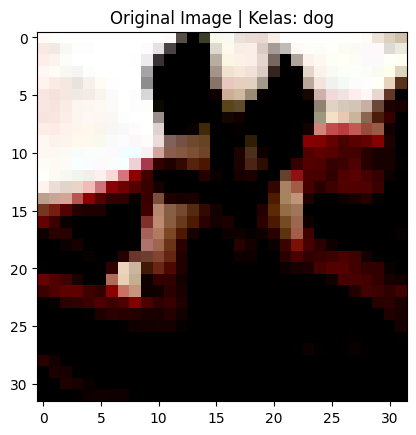

(4, 6, 28, 28)


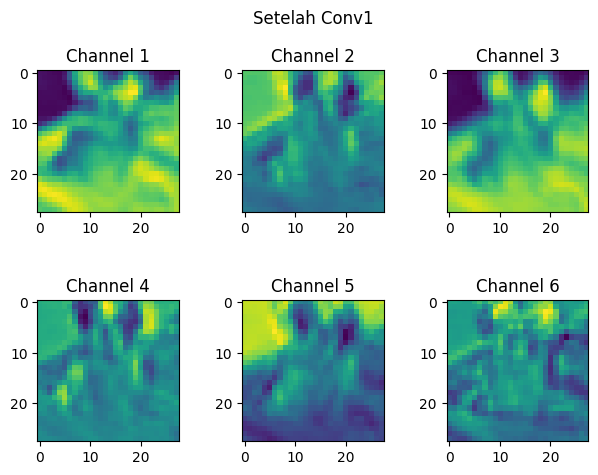

(4, 6, 14, 14)


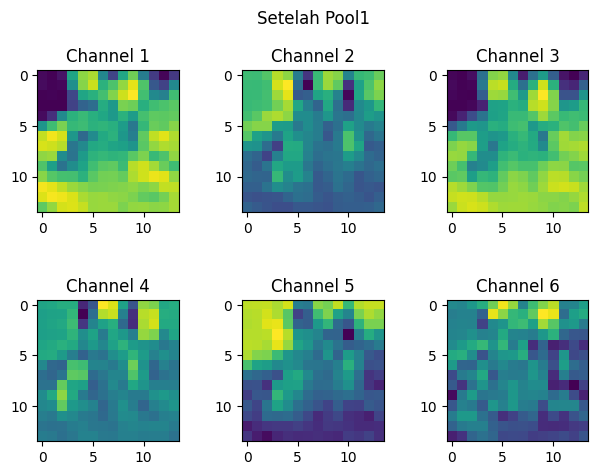

(4, 16, 10, 10)


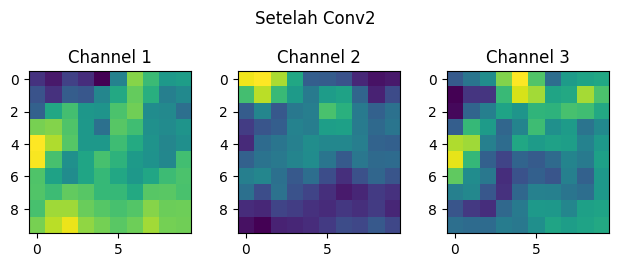

(4, 16, 5, 5)


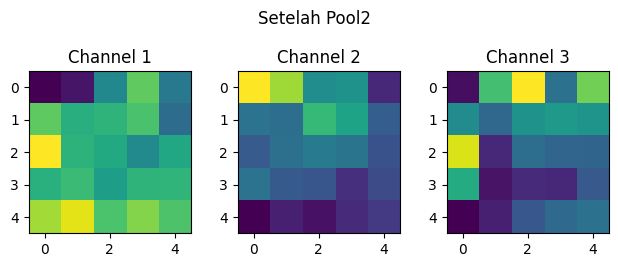

In [95]:
testconv1 = nn.Conv2d(3, 6, 5)
testpool = nn.MaxPool2d(2, 2)
testconv2 = nn.Conv2d(6, 16, 5)
testfc1 = nn.Linear(16 * 5 * 5, 120)
testfc2 = nn.Linear(120, 84)
testfc3 = nn.Linear(84, 10)

plt.imshow(test_images[0].permute(1, 2, 0))
plt.title("Original Image | Kelas: {}".format(classes[test_labels[0]]))
plt.show()

test_images = testconv1(test_images)
ungrad_test_images = test_images.cpu().detach().numpy()
print(ungrad_test_images.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout(h_pad=3)
    plt.imshow(ungrad_test_images[0, i, :, :])
    plt.title("Channel {}".format(i+1))
    plt.suptitle("Setelah Conv1")
plt.show()

test_images = testpool(test_images)
ungrad_test_images = test_images.cpu().detach().numpy()
print(ungrad_test_images.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout(h_pad=3)
    plt.imshow(ungrad_test_images[0, i, :, :])
    plt.title("Channel {}".format(i+1))
    plt.suptitle("Setelah Pool1")
plt.show()

test_images = testconv2(test_images)
ungrad_test_images = test_images.cpu().detach().numpy()
print(ungrad_test_images.shape)

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.tight_layout(h_pad=3)
    plt.imshow(ungrad_test_images[0, i, :, :])
    plt.title("Channel {}".format(i+1))
    plt.suptitle("Setelah Conv2")
plt.show()

test_images = testpool(test_images)
ungrad_test_images = test_images.cpu().detach().numpy()
print(ungrad_test_images.shape)

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.tight_layout(h_pad=3)
    plt.imshow(ungrad_test_images[0, i, :, :])
    plt.title("Channel {}".format(i+1))
    plt.suptitle("Setelah Pool2")
plt.show()

# Tahap Training dan Testing
### Training Loop

In [96]:
n_total_steps = len(trainloader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, n_total_steps, loss.item()))

print('Training Selesai')

Epoch [1/20], Step [100/12500], Loss: 2.3117
Epoch [1/20], Step [200/12500], Loss: 2.3220
Epoch [1/20], Step [300/12500], Loss: 2.2873
Epoch [1/20], Step [400/12500], Loss: 2.3188
Epoch [1/20], Step [500/12500], Loss: 2.3082
Epoch [1/20], Step [600/12500], Loss: 2.3099
Epoch [1/20], Step [700/12500], Loss: 2.3255
Epoch [1/20], Step [800/12500], Loss: 2.2909
Epoch [1/20], Step [900/12500], Loss: 2.3083
Epoch [1/20], Step [1000/12500], Loss: 2.3029
Epoch [1/20], Step [1100/12500], Loss: 2.3156
Epoch [1/20], Step [1200/12500], Loss: 2.2896
Epoch [1/20], Step [1300/12500], Loss: 2.3026
Epoch [1/20], Step [1400/12500], Loss: 2.3126
Epoch [1/20], Step [1500/12500], Loss: 2.2661
Epoch [1/20], Step [1600/12500], Loss: 2.3180
Epoch [1/20], Step [1700/12500], Loss: 2.2993
Epoch [1/20], Step [1800/12500], Loss: 2.2562
Epoch [1/20], Step [1900/12500], Loss: 2.2943
Epoch [1/20], Step [2000/12500], Loss: 2.2984
Epoch [1/20], Step [2100/12500], Loss: 2.3036
Epoch [1/20], Step [2200/12500], Loss: 2.29

### Testing Loop

In [97]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]

    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    print(f'Accuracy: {n_correct/n_samples*100:.4f}%')

    for i in range(10):
        print(f'Akurasi kelas- {classes[i]}: {n_class_correct[i]/n_class_samples[i]*100:.4f}%')

Accuracy: 68.3420%
Akurasi kelas- plane: 75.5400%
Akurasi kelas- car: 86.5000%
Akurasi kelas- bird: 43.3800%
Akurasi kelas- cat: 37.7200%
Akurasi kelas- deer: 82.8400%
Akurasi kelas- dog: 60.3200%
Akurasi kelas- frog: 68.6400%
Akurasi kelas- horse: 74.5400%
Akurasi kelas- ship: 83.3200%
Akurasi kelas- truck: 70.6200%


# Menyimpan Parameter dari Model
Lihat disini dokumentasi terkait penyimpanan objek menggunakan torch

Penjelasan Kode:

- perintah torch.save digunakan untuk menyimpan objek (termasuk parameter model) menjadi sebuah file
- argumen pertama adalah objek yang akan disimpan, dalam hal ini adalah parameter model
- argumen kedua adalah nama file yang akan disimpan
- dalam PyTorch pada umumnya kita menggunakan ekstensi file .pt atau .pth untuk menyimpan parameter model

In [100]:
torch.save(model.state_dict(), './35_data/convnet.pth') # silahkan sesuaikan path dengan folder anda

Memuat Parameter Model Untuk memuat kembali parameter dari model yang telah disimpan, langkah pertama haruslah mengcopy dahulu modelnya sebelum memasukkan parameter tersimpan.

Penjelasan:

- perintah torch.load digunakan untuk memuat objek (termasuk parameter model) dari sebuah file
- model2.eval() menyatakan bahwa model akan berperilaku dalam mode evaluasi. Beberapa komponen ataupun layer dalam model akan menyesuaikan perilakunya ketika dalam model evaluasi seperti mematikan Dropout. Lihat pembahasan lengkap di sini atau tonton video penjelasannya di sini

In [102]:
model2 = ConvNet().to(device)
model2.load_state_dict(torch.load('./35_data/convnet.pth'))

# model siap untuk tahap testing (mode evaluasi)
with torch.no_grad():
    model2.eval()
    print(model2)

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
